In [1]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg
def imggen(img_path):
    img= mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

We start with
### linear regression

a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term)

y_hat= hθ (x) = θ· x  (model's prediction)
also equal to theta_transpose . x (matrix multiplication)

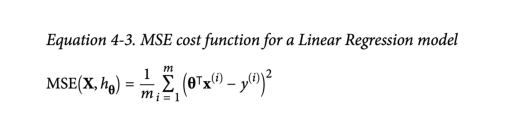

In [2]:
imggen('lr_loss.png') # where h0 is the hypothesis function for the lr model

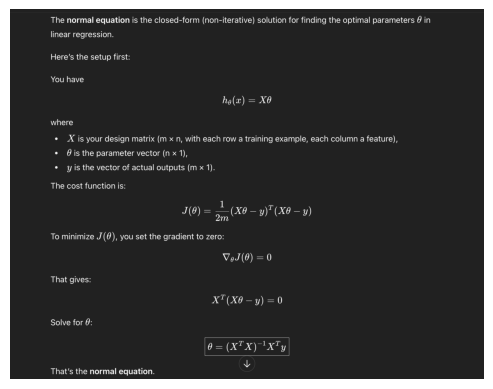

In [3]:
imggen('normal equation.png')

# θ= inv(X⊺X). X⊺ .y

In [4]:
#generate a sequence
import numpy as np 
X=2*np.random.rand(100,1)
y=4+3*(X) + np.random.randn(100,1)

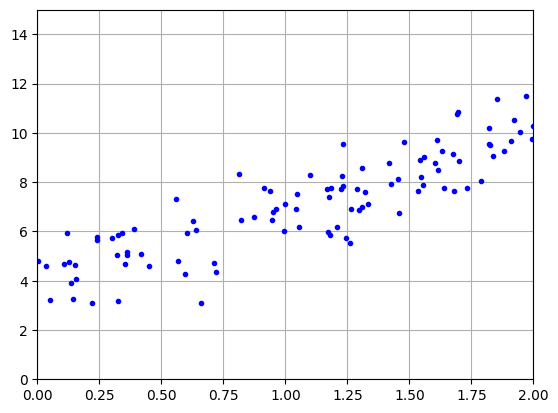

In [5]:
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [6]:
X_b= np.c_[np.ones((100,1)),X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
#we have ehe thetabest now we can get the prediction
X_new= np.array([[0],[2]])
X_new_b= np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.89368572],
       [9.90202733]])

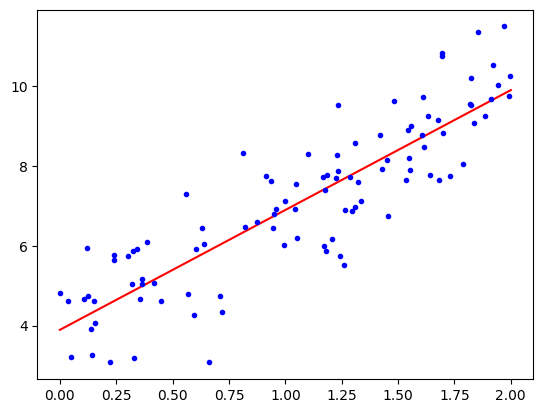

In [8]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')


In [9]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([3.89368572]), array([[3.00417081]]))

In [10]:
lin_reg.predict(X_new)

array([[3.89368572],
       [9.90202733]])

The pseudoinverse is computed using Singular Value Decomposition (SVD), which decomposes the matrix X into U Σ V⊺. The pseudoinverse X+ is calculated as V Σ+ U⊺, where:


Σ+ is derived by:
Setting very small values in Σ to zero.
Replacing nonzero values with their inverse.
Transposing the resulting matrix.
This method is more efficient and robust than the Normal Equation, as it works even when X⊺X is non-invertible (e.g., when m < n or features are redundant).


this allows for direct calculation of the model's parameters but takes a lot of time to train, when scaled the computational complexity goes from O(n^2.5) to o(n^3) times 5.3-8, the SVD approach is o(n2). So for large number of features we go for gradient descent approach..

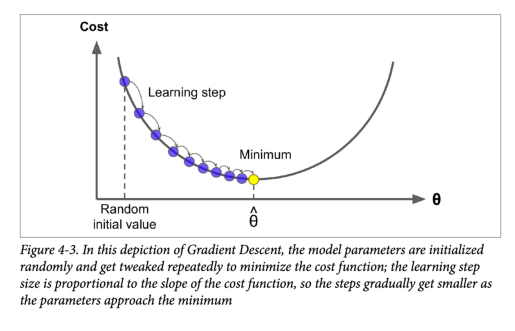

In [11]:
imggen('grad_desc.png')

the step size of the converge is taken in consideration with the learning rate hyperparameter, too small and it takes forever, too large and it deviates from the path to minima( other side even higher maybe)

### When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

the partial derivative has to be calculated for every feature at every instance, probably why its called batch grad desc.

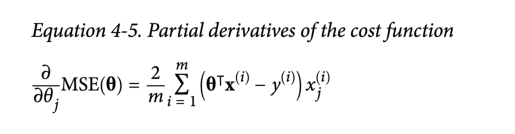

In [12]:
imggen('part_der.png')

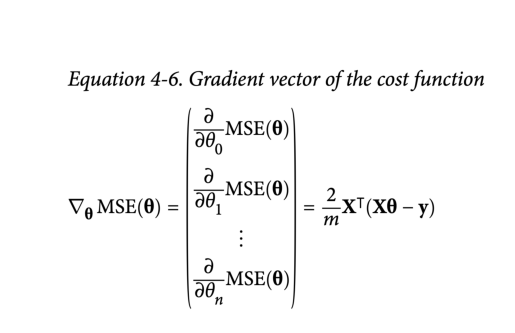

In [13]:
imggen('graddesc.png')

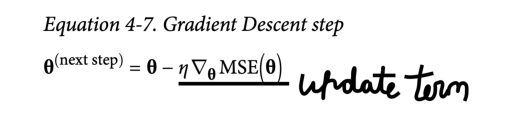

In [14]:
imggen('updatefunction.png')

for. any function f(x,y), the gradient is a vector that points in the direction of the 
#### steepest increase 
of that function, so the intuition is if we are going down a hill the gradient is the slope of the uphill. which is why we subtract it from the assumed initial weight(theta). So downhill is the direction of decreasing loss.

In [15]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    update= 2/m*(X_b.T).dot(X_b.dot(theta)-y)
    theta= theta- (eta*update)

In [16]:
theta

array([[3.89368572],
       [3.00417081]])

## SGD 
Batch Gradient Descent is slow for large datasets as it computes gradients using the entire training set, while Stochastic Gradient Descent (SGD) is faster by using one random instance at a time, making it suitable for large datasets.

 However, SGD is less stable, bouncing around the minimum and never fully settling. And so, the final parameters are good not optimal

 also sgd's randomness can get to optimal solutions more easily incase of irregular functions/
 to fix that we could try to reduce learning rate slowly as we go down( starting from a large value), the algorithm that defines the rate is called
##### learning schedule


In [17]:
n_epochs=50
t0, t1= 5,50

def learning_schedule(t):
    return t0/(t+t1)
np.random.seed(42)
theta= np.random.randn(2,1)

for x in range(n_epochs):
    for i in range(m):
        random_index= np.random.randint(m)
        Xi=X_b[random_index: random_index+1]
        yi=y[random_index: random_index+1]# selecting an instance from random
        gradients= 2*Xi.T.dot(Xi.dot(theta)-yi)
        eta= learning_schedule(x*m + i)
        theta= theta- eta*gradients
        # plt.plot(theta )


theta


array([[3.94607977],
       [2.91644612]])

In [18]:
from sklearn.linear_model import SGDOneClassSVM, SGDRegressor
sgd_clf= SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0= 0.01)
sgd_clf.fit(X, y.ravel())


,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [19]:
sgd_clf.intercept_,sgd_clf.coef_

(array([3.52159342]), array([3.30428584]))

finally we have the MINI-BATCH GRADIENT DESCENT
we use batches of instances for calculation of every gradient( its like middle ground)

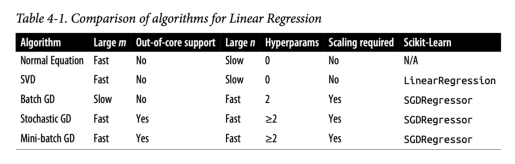

In [20]:
imggen('comparo.png')

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [23]:
X[0]

array([1.97322766])

In [24]:
X_poly[0]

array([1.97322766, 3.89362739])

In [25]:
lin_reg= LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([2.19573036]), array([[1.00978737, 0.4681429 ]]))

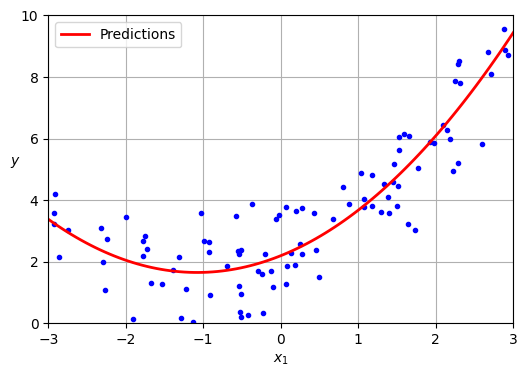

In [26]:
#this is the right code to get the plot as we need to create fresh-
# predictions from the trained linreg model and then plot them 

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
# save_fig("quadratic_predictions_plot")
plt.show()

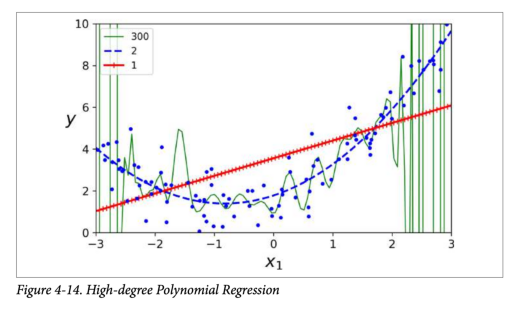

In [27]:
imggen('hdpr.png')

as we see the 300 polynomial is severly overfitting and linear is underfitting, quadratic fits best as the data was generated for quad,
but in general we won't know that.

in such cases,  If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting.


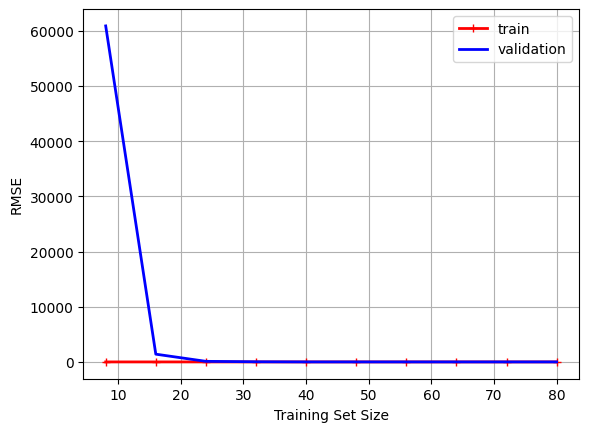

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val= train_test_split(X,y, test_size=0.3)
#     train_error, val_error=[],[]
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m],y_train[:m])
#         y_train_predict= model.predict(X_train[:m])
#         y_train_val=model.predict(X_val[:m])
#         train_error.append(mean_squared_error(y_train[:m],y_train_predict))
#         val_error.append(mean_squared_error(y_val[:m],y_train_val))
#     plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label='train')
#     plt.plot(np.sqrt(val_error),'b-', linewidth=3, label='val')
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    polynomial_regression, X, y, 
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10-100% of training data
    cv=5, 
    scoring='neg_mean_squared_error'
)

train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
val_scores_mean = np.sqrt(-val_scores.mean(axis=1))

plt.plot(train_sizes, train_scores_mean, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, val_scores_mean, 'b-', linewidth=2, label='validation')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

Text(0, 0.5, 'rmse')

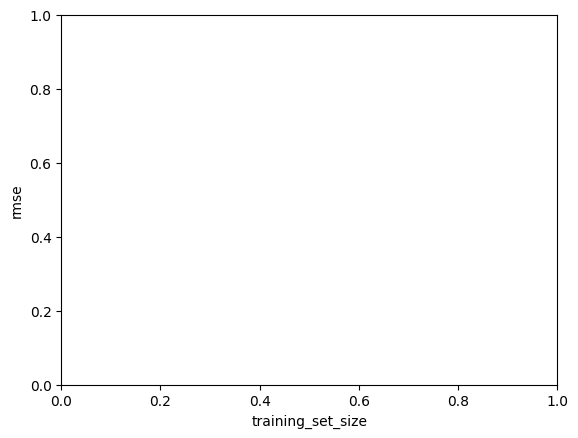

In [35]:
lin_reg= LinearRegression()
learning_curve(lin_reg, X, y)
plt.xlabel('training_set_size')
plt.ylabel('rmse')

reason for a high val error= can't generalize inititally, and later it reaches a plateau meaning it can no more improve or reduce the error meaning the model is underfitting.

if the gap between val and train lines would have been higher that would mean overfitting as showin in the next example. One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg ",LinearRegression()),
])
plot_learning_curves(polynomial_regression,X,y)

NameError: name 'plot_learning_curves' is not defined

no idea why i'm getting 0 val and trainn error even tho it should overfit badly.

## The Bias/Variance Trade-off

An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:


Bias
This part of the generalization error is due to wrong assumptions, such as assum‐
ing that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.

8.Variance
This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree pol‐
ynomial model) is likely to have high variance and thus overfit the training data.

Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).


Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a trade-off.

## regularization 
RIDGE= L1 regularization
LASSO= L2 regularization

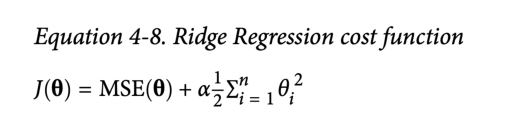

In [38]:
imggen('ridgereg.png')

In [ ]:
np.random.seed(42)
m=20
X=3*(np.random.rand(m,1))
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new= np.linspace(0,3,100).reshape(100,1)
#linsoace creates an array of 100 evenly spaced values from 0-3

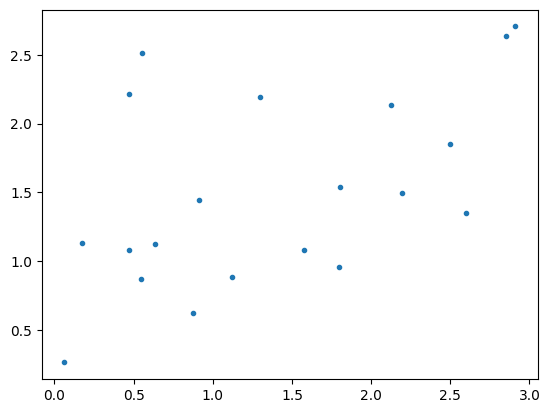

In [44]:
plt.plot(X,y,".")

In [52]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.55325833])

In [54]:
# y.ravel() is used for converting a multidimensional array into a single dimensional array
sgd_clf=SGDRegressor(penalty='l2')
sgd_clf.fit(X,y.ravel())
sgd_clf.predict([[1.5]])

array([1.46889786])

In [ ]:
plt.plot()

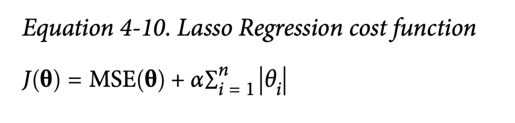

In [51]:
imggen('lasso.png')

In [60]:
alpha=0.1
X_b = np.c_[np.ones(m), X]
A = np.array([[1., 0.], [0., 1.]])


np.linalg.inv(X_b.T.dot(X_b)+ alpha*A).dot(X_b.T.dot(y))


array([[0.96302187],
       [0.39096765]])

In [63]:
ridge_reg.intercept_,ridge_reg.coef_

(array([0.97898394]), array([0.3828496]))